<img src="../../figs/holberton_logo.png" alt="logo" width="500"/>

# Seaborn for Data Visualization 

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library **built on top of Matplotlib** that provides a high-level interface for creating attractive statistical graphics. 


It **simplifies the process of generating complex visualizations** by abstracting away much of the boilerplate code required. Seaborn offers a wide range of statistical plots, including scatter plots, bar plots, and histograms, with built-in support for color palettes and aesthetic improvements.

## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

### Data

But first, let us get some data. Seaborn comes with built-in data sets!

The **tips** dataset in Seaborn is a collection of information about restaurant tips. It includes details such as the total bill amount, the tip amount, the day of the week, the time of day (lunch or dinner), the size of the dining party, and whether the diners were smokers or non-smokers.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

print(f"Dataset contains {tips.shape} records")

print("Here are the first 5")
tips.head()

Dataset contains (244, 7) records
Here are the first 5


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Let's Visualize Some Data

###  distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\evisp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444445, 0.5, 'Frequency')

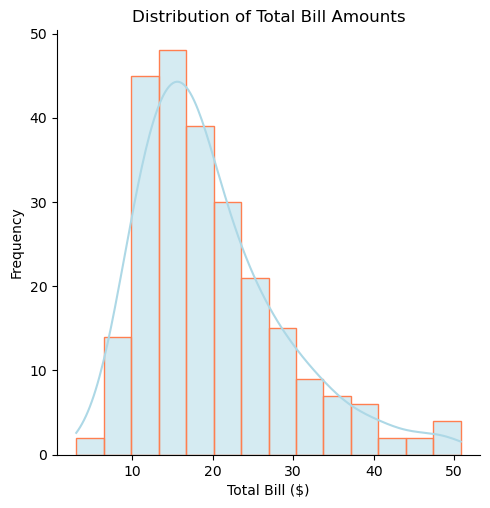

In [2]:
sns.displot(tips['total_bill'], 
            kde=True, 
            color='lightblue',
            edgecolor = "coral"
           )

plt.title("Distribution of Total Bill Amounts")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")

### jointplot

`jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”



We are creating a joint plot to **visualize the relationship between two variables: `total_bill` and `tip`**. By specifying `total_bill` as the x-axis variable and `tip` as the y-axis variable, we *examine how the tip amount varies with the total bill amount*. The `kind` parameter is set to `hex`, indicating that the joint plot will display hexagonal binning to represent the density of data points.

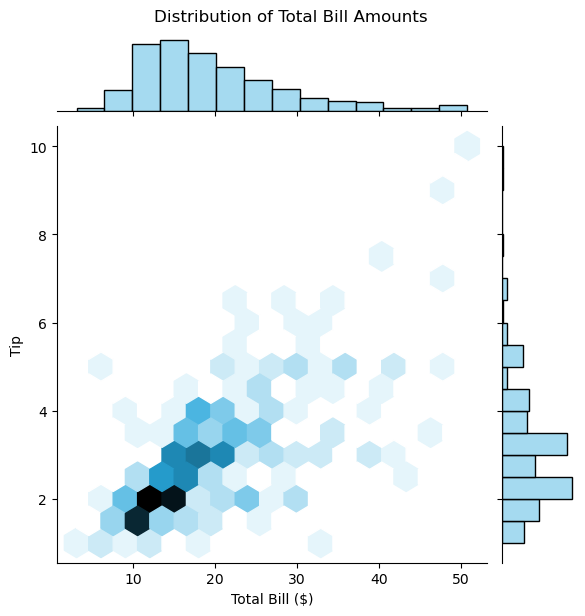

In [3]:
sns.jointplot(
    x='total_bill',
    y='tip',data=tips,
    kind='hex',
    color = 'skyblue'
)

# add the title above the entire figure
plt.suptitle("Distribution of Total Bill Amounts", y=1.02)
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip")
plt.show()

### Explore relationship between the total bill and the tip

To better understand the relationship between `total_bill` and `tip` in the dataset, we can use a scatter plot with regression line. It visually depicts how the tip amount varies with the total bill, providing insights into potential correlations and patterns in the data

C:\Users\evisp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


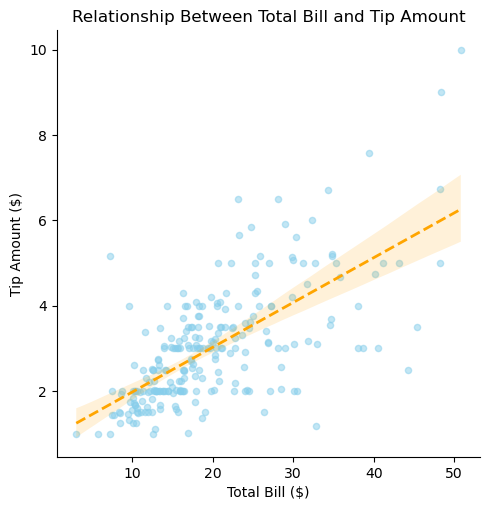

In [6]:
sns.lmplot(x="total_bill", y="tip", data=tips, 
           scatter_kws={"color": "skyblue", "alpha": 0.5, "s": 20},          # Adjust marker color, transparency, and size
           line_kws={"color": "orange", "linestyle": "--", "linewidth": 2})  # Adjust regression line color, style, and width

plt.title("Relationship Between Total Bill and Tip Amount")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Amount ($)")

plt.show()

###  pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

We are creating a pair plot to **visualize the relationships between different pairs of variables in the `tips` dataset**. Each variable is compared with every other variable, and scatterplots are created to show the relationships. 


Additionally, the data points are colored based on the `sex` variable, with different colors representing different genders. This visualization technique helps in understanding the patterns and correlations between variables and how they may vary based on gender

C:\Users\evisp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\evisp\AppData\Local\Temp\ipykernel_8340\72469887.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


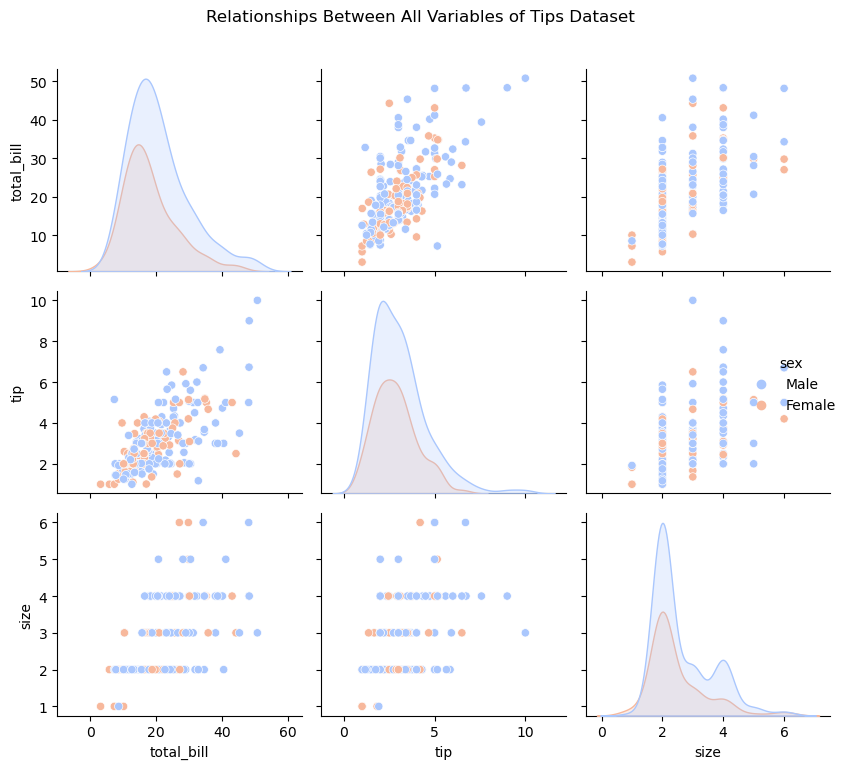

In [7]:
sns.pairplot(tips,
             hue='sex',
             palette='coolwarm'
            )

plt.suptitle("Relationships Between All Variables of Tips Dataset", y=1.02)
plt.tight_layout()
plt.show()

## Categorical plots

Now let's discuss using seaborn to plot categorical data! 

Categorical plots are **types of statistical visualizations that are used to represent the relationship between one categorical variable and one numerical variable or two categorical variables**. 

*A categorical variable is a type of variable that represents qualitative data and can take on a limited number of distinct categories or groups*. 

They are particularly useful for visualizing and understanding the distribution, relationships, and patterns within categorical data. 

There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through some examples.

### barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean. 

Here, we are creating a bar plot **to visualize the relationship between two variables: `sex` and `total_bill`**. 

The bar plot displays the average value of `total_bill` for each category of `sex`, with bars representing the mean value and error bars indicating the uncertainty or variability. 

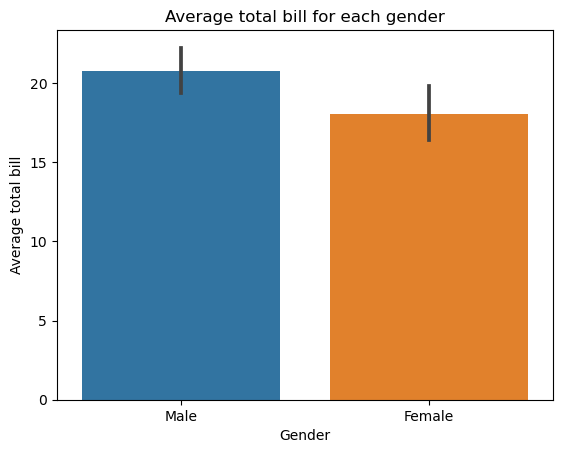

In [9]:
sns.barplot(
    x='sex',
    y='total_bill',
    palette = {'Male': 'lightblue', 'Female': 'lightcoral'},
    data=tips
)

plt.title("Average total bill for each gender")
plt.xlabel("Gender")
plt.ylabel("Average total bill")
plt.show()

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

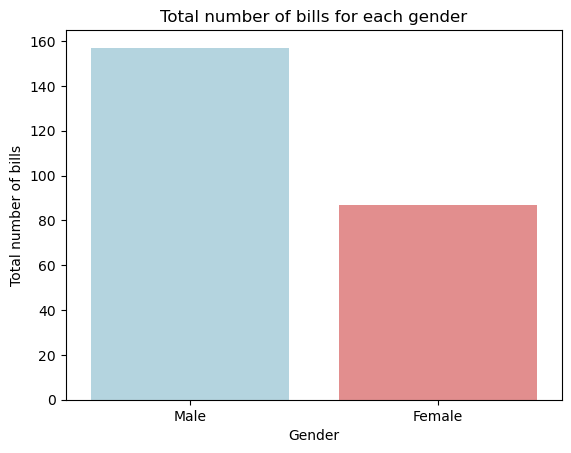

In [10]:
sns.countplot(
    x='sex',
    palette = {'Male': 'lightblue', 'Female': 'lightcoral'},
    data=tips)

plt.title("Total number of bills for each gender")
plt.xlabel("Gender")
plt.ylabel("Total number of bills")
plt.show()

### boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range


In our case, each box represents the interquartile range (IQR) of the `total_bill` values for a specific day, with the median indicated by the horizontal line inside the box. Additionally, whiskers extend from the box to indicate the range of the data, and outliers are represented as individual points beyond the whiskers. 

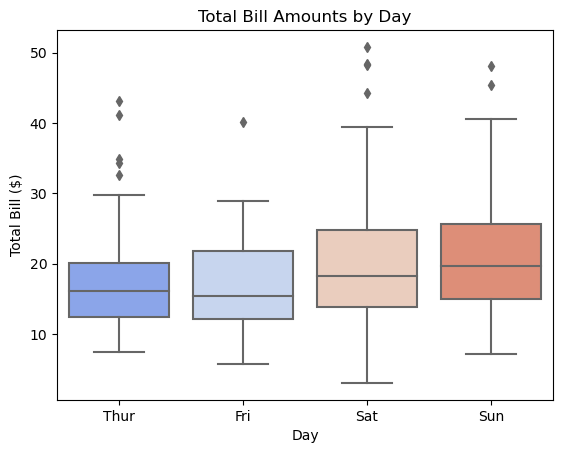

In [11]:
sns.boxplot(
    x="day", 
    y="total_bill", 
    data=tips,
    palette='coolwarm')

plt.title("Total Bill Amounts by Day")
plt.xlabel("Day")
plt.ylabel("Total Bill ($)")

plt.show()

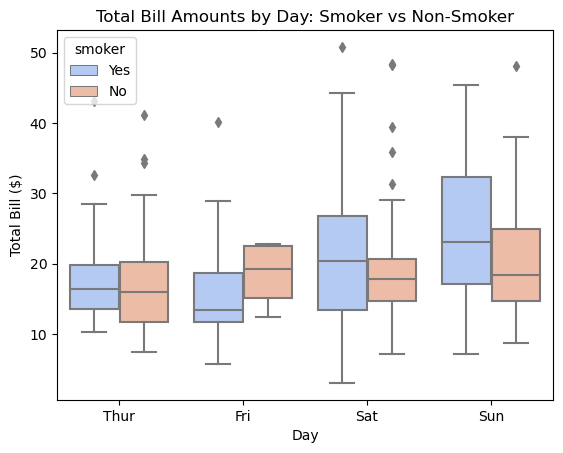

In [12]:
sns.boxplot(
    x="day", 
    y="total_bill", 
    hue = 'smoker',
    data=tips,
    palette='coolwarm')

plt.title("Total Bill Amounts by Day: Smoker vs Non-Smoker")
plt.xlabel("Day")
plt.ylabel("Total Bill ($)")

plt.show()

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

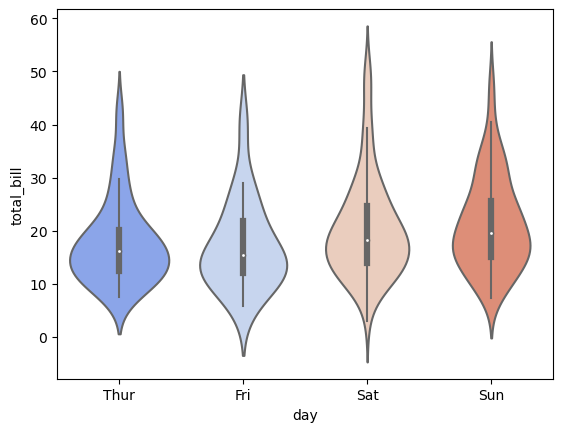

In [13]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='coolwarm')

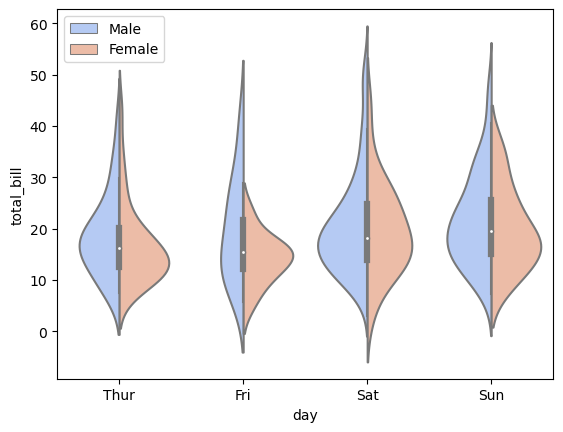

In [14]:
sns.violinplot(
    x="day", 
    y="total_bill", 
    data=tips,
    hue='sex',
    split=True,
    palette='coolwarm')

plt.legend(loc='upper left')
plt.show()

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap. 

We are creating a correlation heatmap **to visualize the correlation between numerical variables in the `tips` dataset**. This heatmap represents the strength and direction of linear relationships between pairs of variables, with warmer colors indicating stronger positive correlations, cooler colors indicating stronger negative correlations, and white indicating no correlation. The annotations on the heatmap display the correlation coefficients

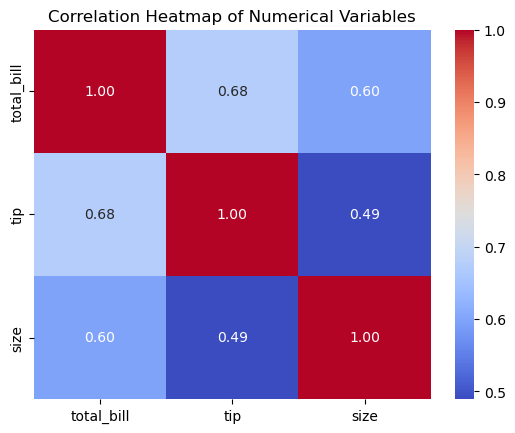

In [15]:
# Select numerical variables
numerical_vars = tips.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_vars.corr()

# Create a heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f")

plt.title("Correlation Heatmap of Numerical Variables")

plt.show()

### Happy coding